In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("perrin-freres-monthly-champagne-.csv")

In [3]:
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [4]:
df.isnull().sum()

Month                                                     1
Perrin Freres monthly champagne sales millions ?64-?72    2
dtype: int64

In [7]:
df=df.dropna()

In [8]:
df.isnull().sum()

Month                                                     0
Perrin Freres monthly champagne sales millions ?64-?72    0
dtype: int64

In [9]:
df.columns=['Month','Sales']

In [10]:
df.head()

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [11]:
df.describe()

,Sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105 entries, 0 to 104
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Month   105 non-null    object 
 1   Sales   105 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.5+ KB


In [13]:
df['Month']= pd.to_datetime(df.Month)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105 entries, 0 to 104
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Month   105 non-null    datetime64[ns]
 1   Sales   105 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.5 KB


In [15]:
df.set_index('Month',inplace=True)

In [16]:
df.head()

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


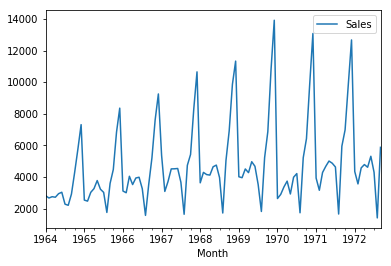

In [17]:
df.plot()

In [18]:
from statsmodels.tsa.stattools import adfuller

In [19]:
result=adfuller(df.Sales)

In [20]:
result

(-1.8335930563276197,
 0.3639157716602465,
 11,
 93,
 {'1%': -3.502704609582561,
  '5%': -2.8931578098779522,
  '10%': -2.583636712914788},
 1478.4633060594724)

Differencing

In [22]:
df['Salesdiff']=df['Sales']-df['Sales'].shift(1)

In [23]:
df.head()

,Sales,Salesdiff
Month,,
1964-01-01,2815.0,NaN
1964-02-01,2672.0,-143.0
1964-03-01,2755.0,83.0
1964-04-01,2721.0,-34.0
1964-05-01,2946.0,225.0


In [24]:
df['Salesdiff12']=df['Sales']-df['Sales'].shift(12)

In [25]:
df

,Sales,Salesdiff,Salesdiff12
Month,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,-143.0,NaN
1964-03-01,2755.0,83.0,NaN
1964-04-01,2721.0,-34.0,NaN
1964-05-01,2946.0,225.0,NaN
...,...,...,...
1972-05-01,4618.0,-170.0,-392.0
1972-06-01,5312.0,694.0,438.0
1972-07-01,4298.0,-1014.0,-335.0


In [26]:
df=df.dropna()

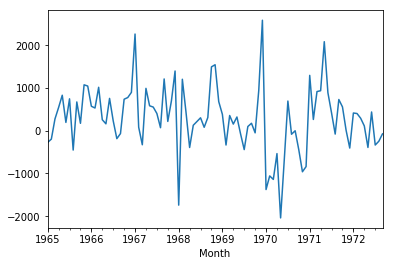

In [27]:
df.Salesdiff12.plot()

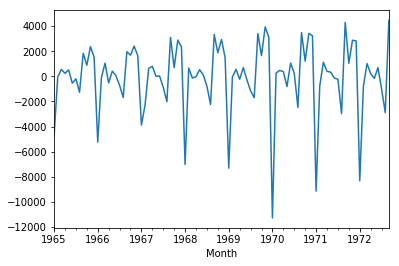

In [28]:
df.Salesdiff.plot()

In [29]:
adfuller(df.Salesdiff12)

(-7.626619157213166,
 2.0605796968136632e-11,
 0,
 92,
 {'1%': -3.503514579651927,
  '5%': -2.893507960466837,
  '10%': -2.583823615311909},
 1294.7753384560438)

In [31]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

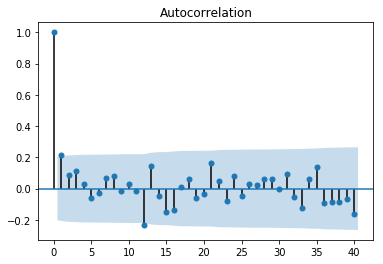

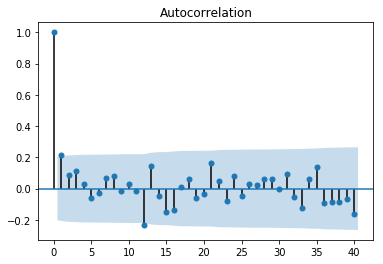

In [32]:
plot_acf(df.Salesdiff12,lags=40)

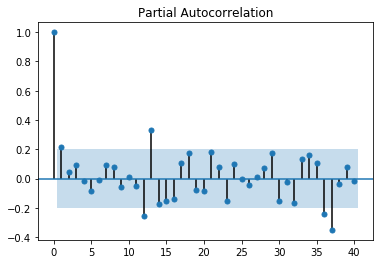

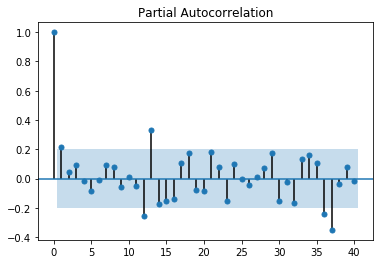

In [33]:
plot_pacf(df.Salesdiff12,lags=40)

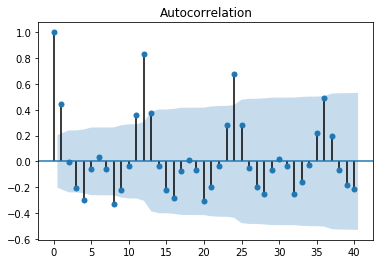

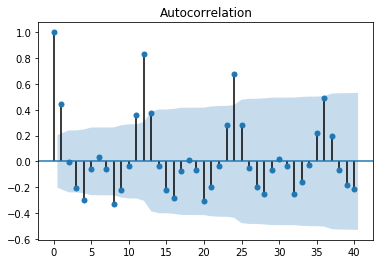

In [36]:
plot_acf(df.Sales,lags=40)

In [35]:
df

,Sales,Salesdiff,Salesdiff12
Month,,,
1965-01-01,2541.0,-4771.0,-274.0
1965-02-01,2475.0,-66.0,-197.0
1965-03-01,3031.0,556.0,276.0
1965-04-01,3266.0,235.0,545.0
1965-05-01,3776.0,510.0,830.0
...,...,...,...
1972-05-01,4618.0,-170.0,-392.0
1972-06-01,5312.0,694.0,438.0
1972-07-01,4298.0,-1014.0,-335.0


In [38]:
from statsmodels.tsa.arima_model import ARIMA

In [43]:
model=ARIMA(df.Sales,order=(1,1,1))
model_fit= model.fit()

c:\users\akash\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\akash\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [44]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Sales   No. Observations:                   92
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -845.250
Method:                       css-mle   S.D. of innovations           2319.063
Date:                Sun, 06 Dec 2020   AIC                           1698.501
Time:                        13:09:56   BIC                           1708.588
Sample:                    02-01-1965   HQIC                          1702.572
                         - 09-01-1972                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            20.4649     15.493      1.321      0.187      -9.900      50.830
ar.L1.D.Sales     0.4358      0.095      4.581      0.000       0.249       0.622
ma.L1.D.Sales    -1.0000      0.029    -34.462      0.000      -1.057      -0.943
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.2946           +0.0000j            2.2946            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

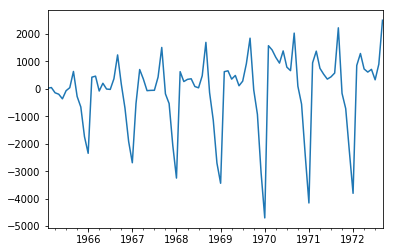

In [46]:
model_fit.predict().plot()

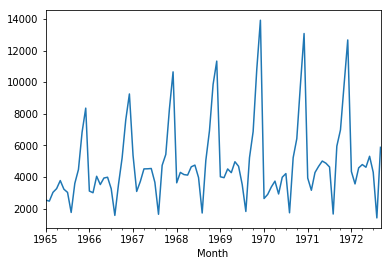

In [48]:
df.Sales.plot()

In [50]:
import statsmodels.api as sm 
model=sm.tsa.statespace.SARIMAX(df.Sales,order=(1,1,1),seasonal_order=(1,1,1,12))

c:\users\akash\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\akash\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [51]:
results=model.fit()

In [54]:
a=results.predict()

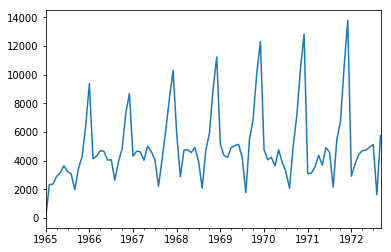

In [55]:
a.plot()